## Argo File Loader

In [6]:
# try with newest snapshot
# try with ftp that gmaze used in issue, probably going to be really slow

In [7]:
import xarray as xr
import numpy as np
import gsw
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
from cmocean import cm as cmo
import xrft
import pandas as pd


import density_funcs as df
import EV_funcs as ef
import filt_funcs as ff
import plot_funcs as pf
import MLD_funcs as mf
import processing_funcs as prf

In [14]:
reload(df)
reload(ef)
reload(ff)
reload(pf)
reload(mf)
reload(prf)

<module 'processing_funcs' from '/home/amf2288/argo-intern/processing_funcs.py'>

## Load by box (coordinate: N_PROF)

In [15]:
#box=[lon_min,lon_max,lat_min,lat_max,depth_min,depth_max]
box_atl = [-25,-20,-70,70,0,2000]
box_pac = [-180,-175,-70,70,0,2000]

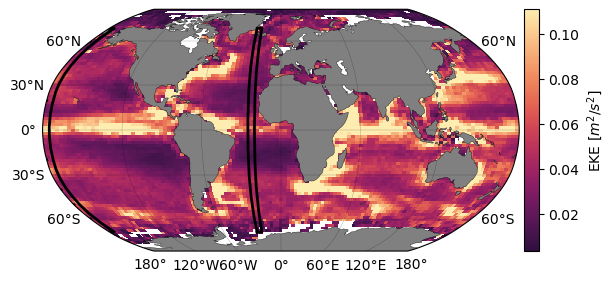

In [16]:
pf.plot_box([box_atl,box_pac])

In [17]:
ds = prf.get_box(box_atl,4)

loading points complete


/home/amf2288/mambaforge-pypy3/envs/argo_Aug_23/lib/python3.10/site-packages/argopy/data_fetchers/gdacftp_data.py:316: UserWarning: Found more than 50 files to load, this may take a while to process sequentially ! Consider using another data source (eg: 'erddap') or the 'parallel=True' option to improve processing time.
  warnings.warn(
 29%|██▉       | 569/1931 [17:10<1:25:54,  3.78s/it]

Oops! <class 'UnicodeDecodeError'> occurred.
Fail to cast SCIENTIFIC_CALIB_COEFFICIENT[('N_PROF', 'N_CALIB', 'N_PARAM')] from 'object' to <class 'str'>
Unique values: [b'                                                                                                                                                                                                                                                                '
 b'ADDITIVE COEFFICIENT FOR PRESSURE ADJUSTMENT IS -0.1 dbar                                                                                                                                                                                                       '
 b'ADDITIVE COEFFICIENT FOR PRESSURE ADJUSTMENT IS -0.2 dbar                                                                                                                                                                                                       '
 b'ADDITIVE COEFFICIENT FOR PRESSURE ADJUSTMENT IS

100%|██████████| 1931/1931 [55:40<00:00,  1.73s/it]


to xarray complete
point to profile complete
interpolation complete
adding spice complete
adding MLD complete


In [18]:
ds

<xarray.Dataset>
Dimensions:            (N_PROF: 10970, PRES_INTERPOLATED: 500)
Coordinates:
  * N_PROF             (N_PROF) int64 1446 1429 1448 1431 ... 24199 23313 23841
    TIME               (N_PROF) datetime64[ns] 2000-12-27T05:50:00 ... 2023-0...
    LATITUDE           (N_PROF) float64 -5.839 -8.064 -6.022 ... 39.81 -17.82
    LONGITUDE          (N_PROF) float64 -23.33 -21.05 -23.11 ... -24.35 -21.94
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 4 8 12 ... 1988 1992 1996
    MLD                (N_PROF) int64 64 4 16 72 64 12 28 ... 24 20 4 8 12 148
    month              (N_PROF) int64 12 12 1 1 1 1 2 2 2 ... 8 8 8 8 8 8 8 8 8
    month_frac         (N_PROF) float64 12.88 12.89 1.566 ... 8.124 8.126 8.128
    year               (N_PROF) int64 2000 2000 2001 2001 ... 2023 2023 2023
    year_frac          (N_PROF) float64 2.001e+03 2.001e+03 ... 2.024e+03
Data variables:
    CT                 (N_PROF, PRES_INTERPOLATED) float64 26.06 26.06 ... 3.017
    CYCLE_NUMBER       (N_PROF) int64 1 1 3 3 4 4 5 ... 205 65 201 16 29 289 127
    DATA_MODE          (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'R' 'A' 'R' 'R' 'R'
    DIRECTION          (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) int64 39045 39042 39045 ... 4902103 4903264
    PRES               (N_PROF, PRES_INTERPOLATED) float32 3.2 4.0 ... 1.996e+03
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 36.15 36.15 ... 34.91
    SA                 (N_PROF, PRES_INTERPOLATED) float64 36.32 36.32 ... 35.08
    SIG0               (N_PROF, PRES_INTERPOLATED) float64 23.87 23.87 ... 27.81
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 26.1 26.1 ... 3.175
    sample_rate        (N_PROF, PRES_INTERPOLATED) float32 3.8 3.8 ... 2.0 1.9
    SPICE              (N_PROF, PRES_INTERPOLATED) float64 6.105 ... 0.1877
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /swot/SUM05/dbalwada/Argo_sync
    Fetched_by:           amf2288
    Fetched_date:         2024/02/15
    Fetched_constraints:  [x=-25.00/-20.00; y=-70.00/70.00; z=0.0/2000.0]
    Fetched_uri:          /swot/SUM05/dbalwada/Argo_sync/dac/bodc/6901146/690...
    history:              Variables filtered according to DATA_MODE; Variable...

In [20]:
print(ds.LONGITUDE.min().values,ds.LONGITUDE.max().values)

-25.0 -20.00016


In [21]:
ds

<xarray.Dataset>
Dimensions:            (N_PROF: 10970, PRES_INTERPOLATED: 500)
Coordinates:
  * N_PROF             (N_PROF) int64 1446 1429 1448 1431 ... 24199 23313 23841
    TIME               (N_PROF) datetime64[ns] 2000-12-27T05:50:00 ... 2023-0...
    LATITUDE           (N_PROF) float64 -5.839 -8.064 -6.022 ... 39.81 -17.82
    LONGITUDE          (N_PROF) float64 -23.33 -21.05 -23.11 ... -24.35 -21.94
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 4 8 12 ... 1988 1992 1996
    MLD                (N_PROF) int64 64 4 16 72 64 12 28 ... 24 20 4 8 12 148
    month              (N_PROF) int64 12 12 1 1 1 1 2 2 2 ... 8 8 8 8 8 8 8 8 8
    month_frac         (N_PROF) float64 12.88 12.89 1.566 ... 8.124 8.126 8.128
    year               (N_PROF) int64 2000 2000 2001 2001 ... 2023 2023 2023
    year_frac          (N_PROF) float64 2.001e+03 2.001e+03 ... 2.024e+03
Data variables:
    CT                 (N_PROF, PRES_INTERPOLATED) float64 26.06 26.06 ... 3.017
    CYCLE_NUMBER       (N_PROF) int64 1 1 3 3 4 4 5 ... 205 65 201 16 29 289 127
    DATA_MODE          (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'R' 'A' 'R' 'R' 'R'
    DIRECTION          (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) int64 39045 39042 39045 ... 4902103 4903264
    PRES               (N_PROF, PRES_INTERPOLATED) float32 3.2 4.0 ... 1.996e+03
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 36.15 36.15 ... 34.91
    SA                 (N_PROF, PRES_INTERPOLATED) float64 36.32 36.32 ... 35.08
    SIG0               (N_PROF, PRES_INTERPOLATED) float64 23.87 23.87 ... 27.81
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 26.1 26.1 ... 3.175
    sample_rate        (N_PROF, PRES_INTERPOLATED) float32 3.8 3.8 ... 2.0 1.9
    SPICE              (N_PROF, PRES_INTERPOLATED) float64 6.105 ... 0.1877
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /swot/SUM05/dbalwada/Argo_sync
    Fetched_by:           amf2288
    Fetched_date:         2024/02/15
    Fetched_constraints:  [x=-25.00/-20.00; y=-70.00/70.00; z=0.0/2000.0]
    Fetched_uri:          /swot/SUM05/dbalwada/Argo_sync/dac/bodc/6901146/690...
    history:              Variables filtered according to DATA_MODE; Variable...

In [22]:
ds.isel(N_PROF)

NameError: name 'N_PROF' is not defined

In [47]:
ds = test

In [55]:
threshold =0.03
dim1 = 'N_PROF'
dim2 = 'PRES_INTERPOLATED'
variable='SIG0'

MLD_li = []

for n in range(0, len(ds[dim1])):
    SIG0_surface = ds.isel({dim1:n})[variable].isel({dim2:0})
    SIG0_diff    = SIG0_surface + threshold
    MLD_ds       = SIG0_surface.where(ds.isel({dim1:n})[variable] < SIG0_diff)
    MLD          = MLD_ds.dropna(dim2).isel({dim2:-1})[dim2].values
    MLD_li.append(MLD)

ds=ds.assign_coords(MLD=(dim1,MLD_li))

In [23]:
ds.isel(N_PROF=2224)

<xarray.Dataset>
Dimensions:            (PRES_INTERPOLATED: 900)
Coordinates:
    N_PROF             int64 2835
    TIME               datetime64[ns] 2008-05-13T06:24:15
    LATITUDE           float64 41.39
    LONGITUDE          float64 -19.93
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 2 4 6 ... 1792 1794 1796 1798
    N_PROF_NEW         int64 2224
    month              int64 5
    month_frac         float64 5.428
    year               int64 2008
    year_frac          float64 2.008e+03
Data variables:
    CT                 (PRES_INTERPOLATED) float64 nan nan nan ... nan nan nan
    CYCLE_NUMBER       int64 94
    DATA_MODE          <U1 'D'
    DIRECTION          <U1 'A'
    PLATFORM_NUMBER    int64 6900250
    PRES               (PRES_INTERPOLATED) float32 nan nan nan ... nan nan nan
    PSAL               (PRES_INTERPOLATED) float32 nan nan nan ... nan nan nan
    SA                 (PRES_INTERPOLATED) float64 nan nan nan ... nan nan nan
    SIG0               (PRES_INTERPOLATED) float64 nan nan nan ... nan nan nan
    TEMP               (PRES_INTERPOLATED) float32 nan nan nan ... nan nan nan
    sample_rate        (PRES_INTERPOLATED) float32 nan nan nan ... nan nan nan
    SPICE              (PRES_INTERPOLATED) float64 nan nan nan ... nan nan nan
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /swot/SUM05/dbalwada/Argo_sync
    Fetched_by:           amf2288
    Fetched_date:         2023/08/08
    Fetched_constraints:  [x=-20.00/-10.00; y=35.00/45.00; z=0.0/2000.0]
    Fetched_uri:          /swot/SUM05/dbalwada/Argo_sync/dac/coriolis/3901643...
    history:              Variables filtered according to DATA_MODE; Variable...

In [57]:
test = xr.concat([ds.isel(N_PROF=slice(0,2224)), ds.isel(N_PROF=slice(2225,-1))],dim='N_PROF')

In [58]:
ds = ds.assign_attrs({"Fetched_uri":''})

In [59]:
ds

<xarray.Dataset>
Dimensions:            (N_PROF: 8003, PRES_INTERPOLATED: 900)
Coordinates:
  * N_PROF             (N_PROF) int64 271 272 273 275 ... 9417 9891 8562 10108
    TIME               (N_PROF) datetime64[ns] 2000-06-18T04:46:59.999999744 ...
    LATITUDE           (N_PROF) float64 42.84 42.38 42.99 ... 43.92 38.61 35.25
    LONGITUDE          (N_PROF) float64 -19.88 -19.5 -18.02 ... -19.15 -14.06
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 2 4 6 ... 1792 1794 1796 1798
    N_PROF_NEW         (N_PROF) int64 0 1 2 3 4 5 ... 7999 8000 8001 8002 8003
    month              (N_PROF) int64 6 6 9 10 4 4 4 5 5 5 ... 7 7 7 7 7 7 8 8 8
    month_frac         (N_PROF) float64 6.607 6.94 9.874 ... 8.113 8.127 8.137
    year               (N_PROF) int64 2000 2000 2000 2000 ... 2023 2023 2023
    year_frac          (N_PROF) float64 2.001e+03 2.001e+03 ... 2.024e+03
    MLD                (N_PROF) int64 14 22 40 24 12 64 30 ... 14 16 4 22 18 18
Data variables:
    CT                 (N_PROF, PRES_INTERPOLATED) float64 16.02 16.02 ... 5.503
    CYCLE_NUMBER       (N_PROF) int64 5 6 0 2 0 0 1 1 ... 10 92 12 106 117 62 13
    DATA_MODE          (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'R' 'R' 'R' 'R' 'R'
    DIRECTION          (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) int64 69032 69032 69039 ... 6901995 6904219
    PRES               (N_PROF, PRES_INTERPOLATED) float32 12.0 ... 1.798e+03
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 35.79 35.79 ... 35.32
    SA                 (N_PROF, PRES_INTERPOLATED) float64 35.96 35.96 ... 35.49
    SIG0               (N_PROF, PRES_INTERPOLATED) float64 26.35 26.35 ... 27.87
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 16.05 16.05 ... 5.686
    sample_rate        (N_PROF, PRES_INTERPOLATED) float32 2.0 2.0 ... 25.12
    SPICE              (N_PROF, PRES_INTERPOLATED) float64 3.107 ... 0.7758
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /swot/SUM05/dbalwada/Argo_sync
    Fetched_by:           amf2288
    Fetched_date:         2023/08/08
    Fetched_constraints:  [x=-20.00/-10.00; y=35.00/45.00; z=0.0/2000.0]
    Fetched_uri:          
    history:              Variables filtered according to DATA_MODE; Variable...

In [24]:
ds = ds.assign_attrs({"Fetched_uri":''})
ds

<xarray.Dataset>
Dimensions:            (N_PROF: 10970, PRES_INTERPOLATED: 500)
Coordinates:
  * N_PROF             (N_PROF) int64 1446 1429 1448 1431 ... 24199 23313 23841
    TIME               (N_PROF) datetime64[ns] 2000-12-27T05:50:00 ... 2023-0...
    LATITUDE           (N_PROF) float64 -5.839 -8.064 -6.022 ... 39.81 -17.82
    LONGITUDE          (N_PROF) float64 -23.33 -21.05 -23.11 ... -24.35 -21.94
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 4 8 12 ... 1988 1992 1996
    MLD                (N_PROF) int64 64 4 16 72 64 12 28 ... 24 20 4 8 12 148
    month              (N_PROF) int64 12 12 1 1 1 1 2 2 2 ... 8 8 8 8 8 8 8 8 8
    month_frac         (N_PROF) float64 12.88 12.89 1.566 ... 8.124 8.126 8.128
    year               (N_PROF) int64 2000 2000 2001 2001 ... 2023 2023 2023
    year_frac          (N_PROF) float64 2.001e+03 2.001e+03 ... 2.024e+03
Data variables:
    CT                 (N_PROF, PRES_INTERPOLATED) float64 26.06 26.06 ... 3.017
    CYCLE_NUMBER       (N_PROF) int64 1 1 3 3 4 4 5 ... 205 65 201 16 29 289 127
    DATA_MODE          (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'R' 'A' 'R' 'R' 'R'
    DIRECTION          (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) int64 39045 39042 39045 ... 4902103 4903264
    PRES               (N_PROF, PRES_INTERPOLATED) float32 3.2 4.0 ... 1.996e+03
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 36.15 36.15 ... 34.91
    SA                 (N_PROF, PRES_INTERPOLATED) float64 36.32 36.32 ... 35.08
    SIG0               (N_PROF, PRES_INTERPOLATED) float64 23.87 23.87 ... 27.81
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 26.1 26.1 ... 3.175
    sample_rate        (N_PROF, PRES_INTERPOLATED) float32 3.8 3.8 ... 2.0 1.9
    SPICE              (N_PROF, PRES_INTERPOLATED) float64 6.105 ... 0.1877
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /swot/SUM05/dbalwada/Argo_sync
    Fetched_by:           amf2288
    Fetched_date:         2024/02/15
    Fetched_constraints:  [x=-25.00/-20.00; y=-70.00/70.00; z=0.0/2000.0]
    Fetched_uri:          
    history:              Variables filtered according to DATA_MODE; Variable...

In [26]:
ds.to_netcdf("/swot/SUM05/amf2288/sync-boxes/lon:({},{})_lat:({},{})_ds_z.nc".format(box_atl[0],box_atl[1],box_atl[2],box_atl[3]))

In [4]:
box_1x = [-10,0,-10,0,0,2000]   #error
box_1y = [-10,0,-20,-10,0,2000] #done
box_1z = [-10,0,-30,-20,0,2000] #done
box_1a = [-10,0,-40,-30,0,2000] #done
box_1b = [-10,0,-50,-40,0,2000] #done
box_1c = [-10,0,-60,-50,0,2000] #done
box_1d = [-10,0,-70,-60,0,2000] #done
box_long=[-10,-8,-70,-10,0,2000]

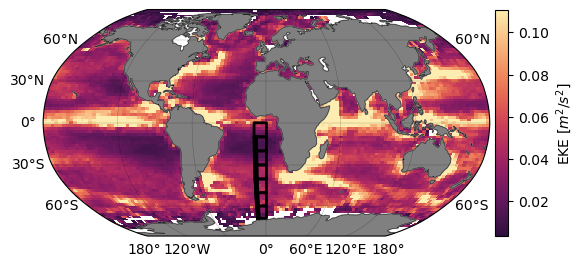

In [5]:
pf.plot_box([box_1x,box_1y,box_1z,box_1a,box_1b,box_1c,box_1d,box_long])

In [6]:
ds_z=ff.get_box(box_long,4)

loading points complete


100%|██████████| 708/708 [41:16<00:00,  3.50s/it]


to xarray complete
point to profile complete
interpolation complete
adding spice complete


In [7]:
ds['N_PROF'].attrs = {'name':'Fetched Profile Number'}
ds['PRES_INTERPOLATED'].attrs = {'name':'Interpolated Pressure', 'units':'dbar', 'notes':'interpolated to standard pressure grid of 2m'}

ds['N_PROF_NEW'].attrs = {'name':'Sequential Profile Number'}
ds['LATITUDE'].attrs = {'name':'Latitude', 'units':'°N'}
ds['LONGITUDE'].attrs = {'name':'Longitude', 'units':'°E'}
ds['month'].attrs = {'name':'Month'}
ds['year'].attrs = {'name':'Year'}
ds['MLD'].attrs = {'name':'Mixed Layer Depth', 'units':'m'}

ds['CT'].attrs = {'name':'Conservative Temperature', 'units':'°C'}
ds['SA'].attrs = {'name':'Absolute Salinity', 'units':'g kg-1'}
ds['SIG0'].attrs = {'name':'Potential Density', 'units':'kg m-1', 'notes':'referenced to 0 dbar'}
ds['SPICE'].attrs = {'name':'Spiciness', 'units':'kg m-1', 'notes':'referenced to 0 dbar'}                  
ds = ds.assign_attrs({"Fetched_uri":''})

In [8]:
ds_z

<xarray.Dataset>
Dimensions:                (N_PROF: 761, PRES_INTERPOLATED: 1000)
Coordinates:
  * N_PROF                 (N_PROF) int64 1215 1216 1217 1219 ... 4449 4450 4451
    TIME                   (N_PROF) datetime64[ns] 2015-11-25T23:34:22 ... 20...
    LATITUDE               (N_PROF) float64 -48.89 -48.29 ... -47.38 -46.22
    LONGITUDE              (N_PROF) float64 -8.963 -9.037 ... -8.285 -8.139
  * PRES_INTERPOLATED      (PRES_INTERPOLATED) int64 0 2 4 6 ... 1994 1996 1998
    N_PROF_NEW             (N_PROF) int64 0 1 2 3 4 5 ... 756 757 758 759 760
Data variables:
    CONFIG_MISSION_NUMBER  (N_PROF) int32 4 4 4 2 2 4 4 4 ... 8 8 8 8 10 10 10 6
    CT                     (N_PROF, PRES_INTERPOLATED) float64 3.279 ... 1.839
    CYCLE_NUMBER           (N_PROF) int32 116 117 118 106 ... 119 120 121 101
    DATA_MODE              (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION              (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_PROF) int32 1901599 1901599 ... 7900202 7900203
    PRES                   (N_PROF, PRES_INTERPOLATED) float32 1.1 ... 1.998e+03
    PSAL                   (N_PROF, PRES_INTERPOLATED) float32 33.82 ... 34.76
    SA                     (N_PROF, PRES_INTERPOLATED) float64 33.98 ... 34.93
    SIG0                   (N_PROF, PRES_INTERPOLATED) float64 26.92 ... 27.8
    TEMP                   (N_PROF, PRES_INTERPOLATED) float32 3.273 ... 1.976
    SPICE                  (N_PROF, PRES_INTERPOLATED) float64 -0.5596 ... -0...
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /swot/SUM05/dbalwada/Argo_sync
    Fetched_by:           amf2288
    Fetched_date:         2023/08/03
    Fetched_constraints:  [x=-10.00/-8.00; y=-70.00/-10.00; z=0.0/2000.0]
    Fetched_uri:          
    history:              Variables filtered according to DATA_MODE; Variable...

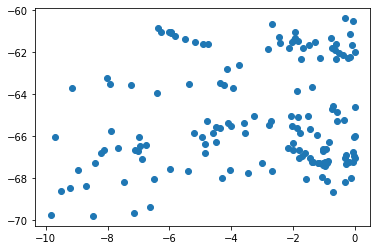

In [39]:
plt.scatter(ds_z.LONGITUDE, ds_z.LATITUDE)

In [9]:
ds_z.to_netcdf("202206_boxes/lon:({},{})_lat:({},{})_ds_z.nc".format(box_long[0],box_long[1],box_long[2],box_long[3]))

In [ ]:
erddap_loader=ArgoDataFetcher(src'erddap',parallel=True,progress=True)

In [41]:
gmaze_loader=ArgoDataFetcher(src='gdac',ftp='https://data-argo.ifremer.fr/',parallel=True,progress=True)

In [ ]:
usa_loader=ArgoDataFetcher(src='gdac',ftp='ftp://usgodae.org/pub/outgoing/argo',parallel=True,progress=True)

In [45]:
ds=argo_loader.region(box_1x)
print('loading points complete')
ds=ds.to_xarray()
print('to xarray complete')

loading points complete


100%|██████████| 193/193 [14:02<00:00,  4.37s/it]


ValueError: 'PROFILE_PSAL_QC' is not present in all datasets.

In [ ]:
ds=ds.argo.teos10(['CT','SA','SIG0'])
ds=ds.argo.point2profile()
print('point to profile complete')

In [7]:
def test_get_box(box,sample_min):
    '''Takes latitude/longitude/depth data and a sample rate and returns an xarray with CT, SA, SIG0, and SPICE interpolated to a pressure grid of 2m. 
    
    box: lat/lon in the form: box=[lon_min, lon_max, lat_min, lat_max, depth_min, depth_max]
    sample_min: minimum sample rate [m]
    '''
    
    ds=argo_loader.region(box)
    print('loading points complete')
    
    ds=ds.to_xarray()
    print('to xarray complete')
    
    ds=ds.argo.teos10(['CT','SA','SIG0'])
    ds=ds.argo.point2profile()
    print('point to profile complete')
    
    ds_interp=get_ds_interp(ds,0,2000,sample_min)
    print('interpolation complete')
    
    ds_interp['SPICE'] = gsw.spiciness0(ds_interp.SA,ds_interp.CT).rename('SPICE')
    print('adding spice complete')
        
    return ds_interp

In [8]:
test = test_get_box(box_medi,4)

loading points complete


100%|██████████| 240/240 [11:02<00:00,  2.76s/it]


AttributeError: 'Dataset' object has no attribute 'PSAL'

In [18]:
ds=argo_loader.region(box_medi)

In [19]:
ds = ds.data

In [20]:
ds

<xarray.Dataset>
Dimensions:                (N_POINTS: 1405747)
Coordinates:
  * N_POINTS               (N_POINTS) int64 0 1 2 3 ... 1405744 1405745 1405746
    TIME                   (N_POINTS) datetime64[ns] 1999-09-29T03:28:00.0000...
    LATITUDE               (N_POINTS) float64 42.0 42.0 42.0 ... 42.8 42.8 42.8
    LONGITUDE              (N_POINTS) float64 -16.0 -16.0 ... -19.78 -19.78
Data variables:
    CONFIG_MISSION_NUMBER  (N_POINTS) int32 1 1 1 1 1 1 1 ... 65 65 65 65 65 65
    CYCLE_NUMBER           (N_POINTS) int32 0 0 0 0 0 0 ... 226 226 226 226 226
    DATA_MODE              (N_POINTS) <U1 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A'
    DIRECTION              (N_POINTS) <U1 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_POINTS) int32 69003 69003 ... 6901193 6901193
    POSITION_QC            (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES                   (N_POINTS) float32 58.0 63.0 ... 1.997e+03 1.999e+03
    PRES_QC                (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP                   (N_POINTS) float32 15.02 14.69 14.41 ... 3.689 3.684
    TEMP_QC                (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC                (N_POINTS) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /swot/SUM05/dbalwada/Argo_sync
    Fetched_by:           amf2288
    Fetched_date:         2023/07/27
    Fetched_constraints:  [x=-20.00/-10.00; y=35.00/45.00; z=0.0/2000.0]
    Fetched_uri:          /swot/SUM05/dbalwada/Argo_sync/dac/coriolis/1900350...
    history:              Variables filtered according to DATA_MODE; Variable...

In [16]:
ds.PSAL.dropna('N_POINTS')

AttributeError: 'Dataset' object has no attribute 'PSAL'

In [ ]:
for n in range(0,len(ds.N_PROF)):
    

In [ ]:
'''
methods are also functions, but specific to the class they're applied to
class (animals) --> subclass (dogs) --> object (golden retriever)
open_mfdataset() from xarray, for opening data in multiple netcdfs
1) write loop opening all files yourself, check for PSAL, if not there remove file
2) go into open_mfdataset() and see if there's a loop there to exploit instead

locally install repo (pip install -e??)
uses the code from the local repo instead
then make changes to repo: print statement in part of the code we think is happening
then work on loops, etc.


'''

In [ ]:
def to_xarray(self, errors: str = "ignore"):
        """ Load Argo data and return a :class:`xarray.Dataset`

        Parameters
        ----------
        errors: str, default='ignore'
            Define how to handle errors raised during data URIs fetching:

                - 'ignore' (default): Do not stop processing, simply issue a debug message in logging console
                - 'silent':  Do not stop processing and do not issue log message
                - 'raise': Raise any error encountered

        Returns
        -------
        :class:`xarray.Dataset`
        """
        if (
            len(self.uri) > 50
            and isinstance(self.method, str)
            and self.method == "sequential"
        ):
            warnings.warn(
                "Found more than 50 files to load, this may take a while to process sequentially ! "
                "Consider using another data source (eg: 'erddap') or the 'parallel=True' option to improve processing time."
            )
        elif len(self.uri) == 0:
            raise DataNotFound("No data found for: %s" % self.indexfs.cname)

        # Download data:
        ds = self.fs.open_mfdataset(
            self.uri, #list of all float files?
            method=self.method,
            concat_dim="N_POINTS",
            concat=True,
            preprocess=self._preprocess_multiprof,
            progress=self.progress,
            errors=errors,
            open_dataset_opts={'xr_opts': {'decode_cf': 1, 'use_cftime': 0, 'mask_and_scale': 1}},
        )

        # Data post-processing:
        ds["N_POINTS"] = np.arange(
            0, len(ds["N_POINTS"])
        )  # Re-index to avoid duplicate values
        ds = ds.set_coords("N_POINTS")
        ds = ds.sortby("TIME")

        # Remove netcdf file attributes and replace them with simplified argopy ones:
        ds.attrs = {}
        if self.dataset_id == "phy":
            ds.attrs["DATA_ID"] = "ARGO"
        if self.dataset_id == "bgc":
            ds.attrs["DATA_ID"] = "ARGO-BGC"
        ds.attrs["DOI"] = "http://doi.org/10.17882/42182"
        ds.attrs["Fetched_from"] = self.server
        ds.attrs["Fetched_by"] = getpass.getuser()
        ds.attrs["Fetched_date"] = pd.to_datetime("now", utc=True).strftime("%Y/%m/%d")
        ds.attrs["Fetched_constraints"] = self.cname()
        if len(self.uri) == 1:
            ds.attrs["Fetched_uri"] = self.uri[0]
        else:
            ds.attrs["Fetched_uri"] = ";".join(self.uri)

        return ds

In [ ]:
print(ds_z.SIG0.values.min(), ds_z.SIG0.values.max())

In [ ]:
rho_grid = np.linspace(26.6, 28, 1001)

In [ ]:
ds_rho = df.interpolate2density_prof(ds_z, rho_grid)

In [ ]:
ds_rho

In [ ]:
ds_rho.to_netcdf("202206_boxes/lon:({},{})_lat:({},{})_ds_rho.nc".format(box[0],box[1],box[2],box[3]))

## Load by float (coordinate: distance)

In [ ]:
float_ID = 6901265

In [ ]:
ds_z = ff.get_float(float_ID, 4)

In [ ]:
ds_z = ds_z.assign_attrs({"Fetched_uri":''})

In [ ]:
ds_z

In [ ]:
ds_z.to_netcdf("202206_floats/float_ID:({})_ds_z.nc".format(float_ID))

In [ ]:
print(ds_z.SIG0.values.min(), ds_z.SIG0.values.max())

In [ ]:
rho_grid = np.linspace(26.4, 28, 1001)

In [ ]:
ds_rho = df.interpolate2density_prof(ds_z, rho_grid)

In [ ]:
ds_rho

In [ ]:
ds_rho.to_netcdf("202206_floats/float_ID:({})_ds_rho.nc".format(float_ID))

## Loading Boxes by Degree

In [132]:
lons = np.arange(-180,181,4)
lats = np.arange(-90,91,4)

boxes=[]

for n in range(0,len(lons)-1):
    for m in range(0,len(lats-1)):
        lon_min = lons[n]
        lon_max = lons[n+1]
        lat_min = lats[n]
        lat_max = lats[n+1]
        box_n = np.array([lon_min, lon_max, lat_min, lat_max])
        boxes.append(box_n)

IndexError: index 46 is out of bounds for axis 0 with size 46

In [136]:
n=0
lons[n+1]

-176

In [64]:
from argopy import IndexFetcher as ArgoIndexFetcher

box_bad=[-15,-14,36.5,37]#, '2000-01-01', '2021-06'] # need to remove pressure poinds because the region function for this index fetcher seems a bit different.

idx = ArgoIndexFetcher(src='gdac',dataset='phy',mode='standard',
                            ftp="/swot/SUM05/dbalwada/202203-ArgoData").region(box_bad).load()
idx.index

,file,date,latitude,longitude,ocean,profiler_code,institution_code,date_update,wmo,institution,profiler
0,aoml/1900041/profiles/D1900041_067.nc,2004-01-02 22:27:49,36.687,-14.002,A,851,AO,2019-05-05 16:50:37,1900041,"AOML, USA","Solo, Seabird conductivity sensor"
1,aoml/1900749/profiles/D1900749_015.nc,2007-05-08 11:55:38,36.716,-14.029,A,851,AO,2019-05-23 14:23:26,1900749,"AOML, USA","Solo, Seabird conductivity sensor"
2,aoml/1900778/profiles/D1900778_123.nc,2011-02-08 11:01:58,36.814,-14.919,A,851,AO,2019-05-30 16:23:14,1900778,"AOML, USA","Solo, Seabird conductivity sensor"
3,coriolis/3901932/profiles/D3901932_118.nc,2021-08-23 06:22:00,36.948,-14.746,A,844,IF,2021-12-01 18:03:09,3901932,"Ifremer, France","Arvor, Seabird conductivity sensor"
4,coriolis/6900137/profiles/D6900137_058.nc,2006-01-21 04:15:00,36.907,-14.205,A,840,IF,2015-10-19 19:21:25,6900137,"Ifremer, France","Provor, no conductivity"
5,coriolis/6900137/profiles/D6900137_059.nc,2006-01-31 04:15:00,36.858,-14.127,A,840,IF,2015-10-19 19:21:26,6900137,"Ifremer, France","Provor, no conductivity"
6,coriolis/6900137/profiles/D6900137_060.nc,2006-02-10 04:39:00,36.954,-14.219,A,840,IF,2015-10-19 19:21:27,6900137,"Ifremer, France","Provor, no conductivity"
7,coriolis/6900137/profiles/D6900137_061.nc,2006-02-20 03:56:00,36.988,-14.305,A,840,IF,2015-10-19 19:21:27,6900137,"Ifremer, France","Provor, no conductivity"
8,coriolis/6900231/profiles/D6900231_036.nc,2004-12-12 17:48:03,36.642,-14.533,A,846,IF,2019-06-03 19:58:58,6900231,"Ifremer, France","Webb Research, Seabird sensor"
9,coriolis/6900231/profiles/D6900231_037.nc,2004-12-22 18:16:56,36.644,-14.734,A,846,IF,2019-06-03 19:58:59,6900231,"Ifremer, France","Webb Research, Seabird sensor"


In [34]:
float_IDs = [1900041,1900749,]

argopy.fetchers.ArgoIndexFetcher